# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [5]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [7]:
cats = pd.read_csv('../data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


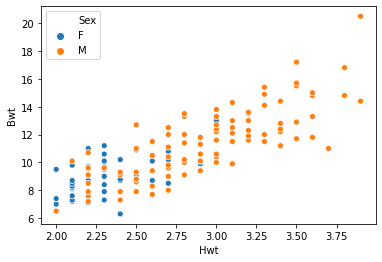

In [14]:
sns.scatterplot(data=cats,x='Hwt', y='Bwt', hue=cats.Sex)

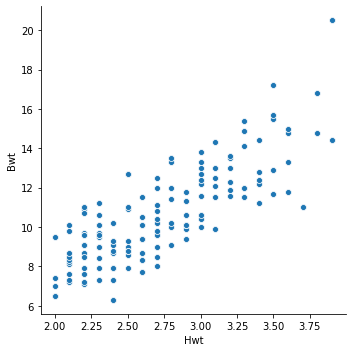

In [11]:
#andere mogelijkheid?
sns.relplot(data=cats,x='Hwt', y='Bwt', hue=cats.Sex)


3. Calculate and draw the regression line.


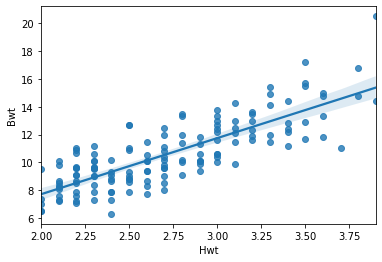

In [13]:
sns.regplot(x=cats.Hwt, y=cats.Bwt)


In [29]:
xwaarde = cats.Hwt.values.reshape(-1,1)
ywaarde = cats.Bwt
rets = LinearRegression().fit(xwaarde, ywaarde)
print(f"Regressielijn: y^={rets.intercept_:.2f} + {rets.coef_[0]:.2f}x")

Regressielijn: y^=-0.35 + 4.03x


4. Calculate the correlation coefficient and the coefficient of determination.

In [32]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")
det = cor**2
print(f"R² = {det}")

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.

In [34]:
print("Er is een sterk verband tussen de twee")

Er is een sterk verband tussen de twee


### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [38]:
cats_m = cats[cats.Sex=="M"]
cats_f = cats[cats.Sex=="F"]

2. Draw a scatter plot of both variables for each gender.


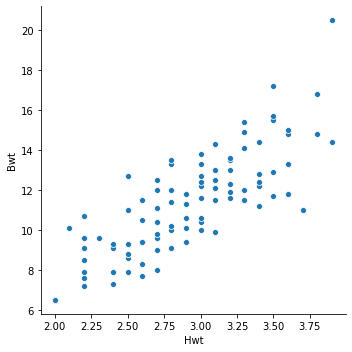

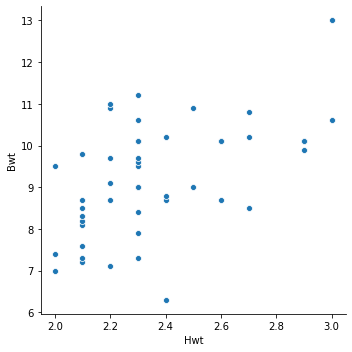

In [40]:
sns.relplot(data=cats_m,x='Hwt', y='Bwt')
sns.relplot(data=cats_f,x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


Regressielijn Male: y^=-1.18 + 4.31x


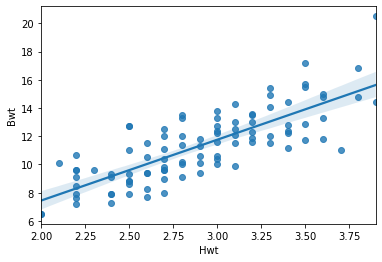

In [46]:
sns.regplot(data=cats_m, x='Hwt', y='Bwt')
xm = cats_m.Hwt.values.reshape(-1,1)
ym = cats_m.Bwt
regm = LinearRegression().fit(xm,ym)
print(f"Regressielijn Male: y^={regm.intercept_:.2f} + {regm.coef_[0]:.2f}x")




Regressielijn Female: y^=2.98 + 2.64x


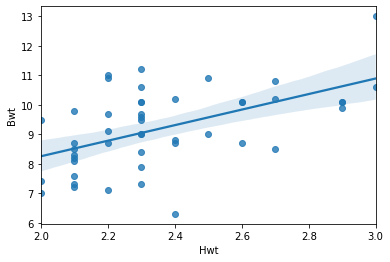

In [47]:
sns.regplot(data=cats_f, x='Hwt', y='Bwt')
xf = cats_f.Hwt.values.reshape(-1,1)
yf = cats_f.Bwt
regf = LinearRegression().fit(xf,yf)
print(f"Regressielijn Female: y^={regf.intercept_:.2f} + {regf.coef_[0]:.2f}x")

Regression line: ŷ = -1.1768252533094827 + 4.309818875119161 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [50]:
corm = np.corrcoef(cats_m.Hwt, cats_m.Bwt)[0][1]
print(f"male R = {corm}")
detm = corm**2
print(f" male R² = {detm}")

corf = np.corrcoef(cats_f.Hwt, cats_f.Bwt)[0][1]
print(f"female R = {corf}")
detf = corf**2
print(f" female R² = {detf}")

male R = 0.7930443171812304
 male R² = 0.628919289013444
female R = 0.5320496665060397
 female R² = 0.28307684762918806


5. Interpret the results from the previous steps.

In [51]:
print("male sterk verbonden ")
print("female gemiddeld verbonden")

male sterk verbonden 
female gemiddeld verbonden


### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [66]:
landbouw = pd.read_csv('../data/Landbouw Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [55]:
landbouw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   jaar                                     41 non-null     int64 
 1   aantal land en tuinbouwbedrijven         41 non-null     int64 
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [67]:
landbouw["gemiddelde oppervlakte per bedrijf (ha)"] = landbouw["gemiddelde oppervlakte per bedrijf (ha)"].str.replace(',','.').astype("float")
landbouw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   jaar                                     41 non-null     int64  
 1   aantal land en tuinbouwbedrijven         41 non-null     int64  
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


4. Draw a scatter plot of the number of farms versus the year.


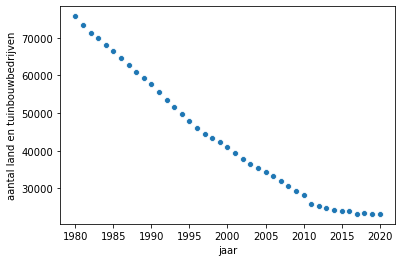

In [73]:
sns.scatterplot(x=landbouw.jaar, y = landbouw["aantal land en tuinbouwbedrijven"])

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [70]:
cor = np.corrcoef(landbouw["jaar"], landbouw["aantal land en tuinbouwbedrijven"])[0][1]
print(f"R = {cor}")

R = -0.9861066349492859


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [71]:
print(f"R² = {cor ** 2}")

R² = 0.9724062954910041


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

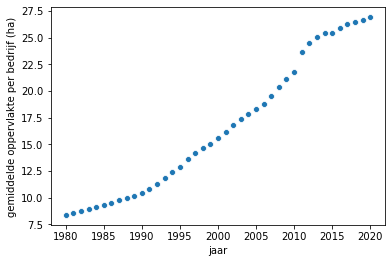

In [74]:
sns.scatterplot(x=landbouw.jaar, y = landbouw["gemiddelde oppervlakte per bedrijf (ha)"])

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [88]:
xwaarde = landbouw.jaar.values.reshape(-1,1)
ywaarde = landbouw["gemiddelde oppervlakte per bedrijf (ha)"]
rets = LinearRegression().fit(xwaarde, ywaarde)
opp= rets.predict(X=[[2035]])
print("Gemiddelde oppervlakte in 2035 = %f" % opp)

Gemiddelde oppervlakte in 2035 = 34.919878


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

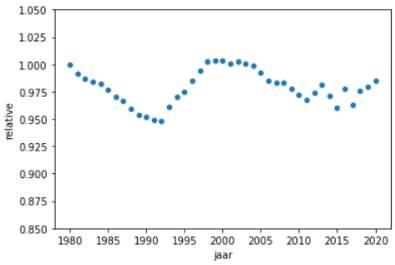


In [89]:
landbouw["totale opp per jaar"] = landbouw["gemiddelde oppervlakte per bedrijf (ha)"] * landbouw["aantal land en tuinbouwbedrijven"] 
help = landbouw.iloc[0, 3]
landbouw["relative"] = landbouw["totale opp per jaar"]/ help
print(help)

634416.28


In [90]:

landbouw.head(10)

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),totale opp per jaar,relative
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941
5,1985,66408,9.33,619586.64,0.976625
6,1986,64624,9.53,615866.72,0.970761
7,1987,62814,9.76,613064.64,0.966344
8,1988,60983,9.98,608610.34,0.959323
9,1989,59365,10.19,604929.35,0.953521


(0.85, 1.05)

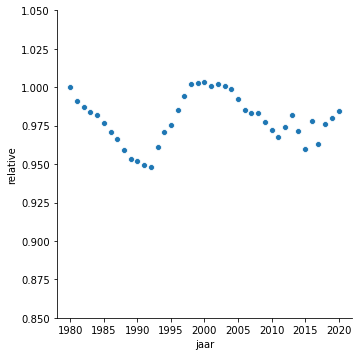

In [94]:
sns.relplot(data=landbouw, y="relative", x="jaar")
plt.ylim(0.85,1.05)

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [107]:
movies = pd.read_csv('../data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [108]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [109]:
for col in cols_with_dollars:
    movies[col] = movies[col].str.replace("$",'').str.replace(" ", "").astype(float)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                211 non-null    float64
 1   Movie                211 non-null    object 
 2   Distributor          211 non-null    object 
 3   Genre                211 non-null    object 
 4   7-day Gross          156 non-null    float64
 5   14-day Gross         149 non-null    float64
 6   Total US Gross       211 non-null    float64
 7   International Gross  188 non-null    float64
 8   US DVD Sales         172 non-null    float64
 9   Budget               138 non-null    float64
dtypes: float64(7), object(3)
memory usage: 16.7+ KB


In [110]:
movies.dropna(inplace=True)
movies.head(10)

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173339068.0,232297818.0,309420425.0,651576067.0,295701718.0,300000000.0
8,9.0,Ghost Rider,Sony Pictures,Action,58960097.0,83257376.0,115802596.0,121900000.0,103699106.0,120000000.0
9,10.0,Saw III,Lionsgate,Horror,44576835.0,63279443.0,80238724.0,83638091.0,47124617.0,10000000.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50705336.0,79668309.0,117144465.0,194600000.0,47716836.0,85000000.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150338458.0,227906792.0,322719944.0,476238218.0,174342569.0,160000000.0
15,16.0,The Holiday,Sony Pictures,Romantic Comedy,17110339.0,30092962.0,63280000.0,141910324.0,71202459.0,85000000.0
20,21.0,Ratatouille,Buena Vista,Comedy,80517305.0,124984886.0,206445654.0,418000000.0,189036784.0,150000000.0
21,22.0,The Hills Have Eyes II,Fox Searchlight,Horror,11883609.0,17579582.0,20804166.0,16662372.0,30466195.0,15000000.0


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

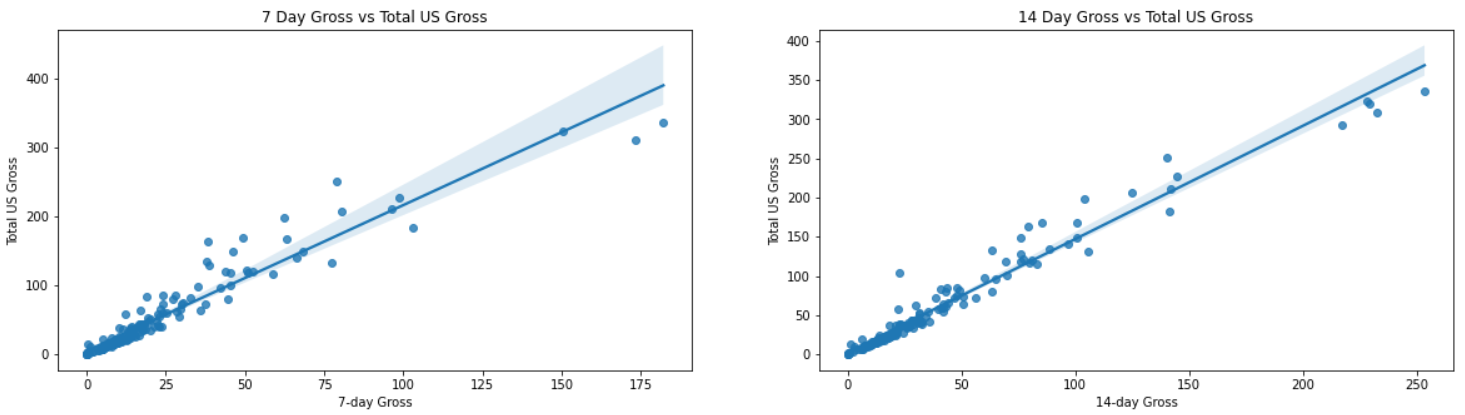

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

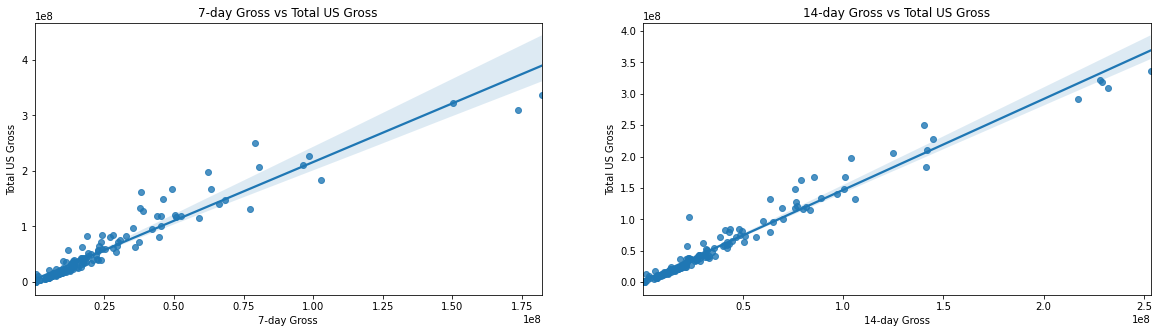

In [98]:
fig,axs = plt.subplots(1,2 ,figsize=(20,5))
sns.regplot(ax=axs[0],x= movies["7-day Gross"], y=movies["Total US Gross"])
axs[0].set_title("7-day Gross vs Total US Gross")
sns.regplot(ax=axs[1],x= movies["14-day Gross"], y=movies["Total US Gross"])
axs[1].set_title("14-day Gross vs Total US Gross")

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [ ]:
cor = np.corrcoef(movies["7-day Gross"], movies["Total US Gross"])[0][1]
print(f"R (7 Day Gross) = {cor}")
print(f"R² = {cor ** 2}")

cor = np.corrcoef(movies["14-day Gross"], movies["Total US Gross"])[0][1]
print(f"R (7 Day Gross) = {cor}")
print(f"R² = {cor ** 2}")

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [111]:
movies_x = movies["7-day Gross"].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"7 day gross: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

movies_x = movies["14-day Gross"].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"14 day gross: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

7 day gross: ŷ = 9380048.64 + 2.03 x
14 day gross: ŷ = 3162434.30 + 1.45 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

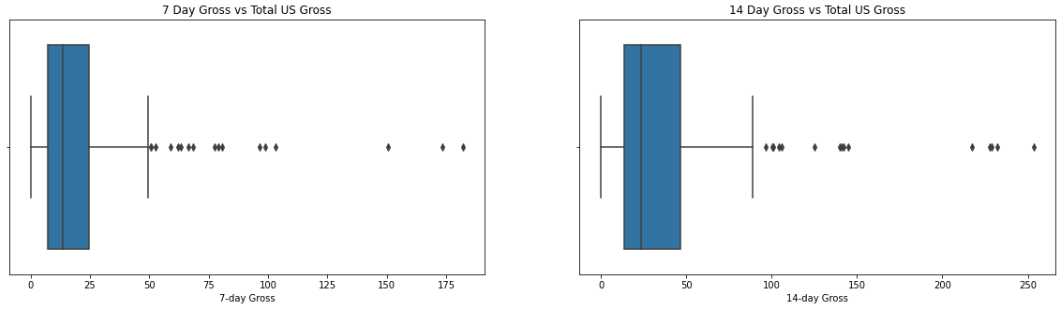

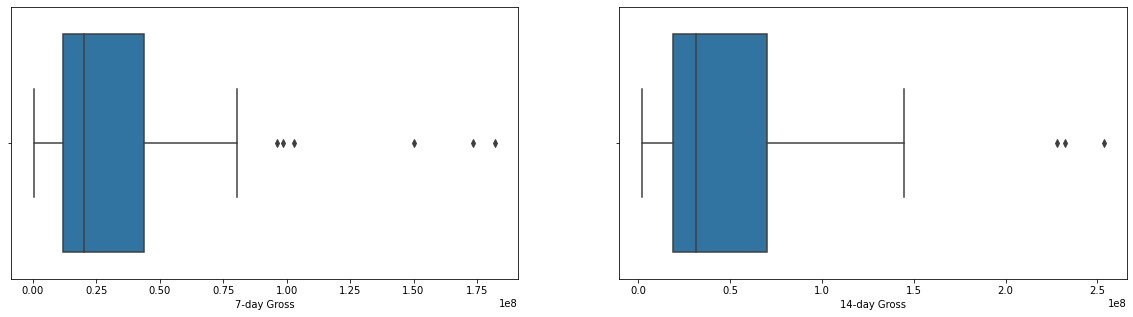

In [112]:
fig,axs = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(ax= axs[0], x= movies["7-day Gross"])
sns.boxplot(ax = axs[1], x= movies["14-day Gross"])

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [113]:
movies2 = movies[movies['7-day Gross'] < 0.8 * 10**8] 
movies2.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
8,9.0,Ghost Rider,Sony Pictures,Action,58960097.0,83257376.0,115802596.0,121900000.0,103699106.0,120000000.0
9,10.0,Saw III,Lionsgate,Horror,44576835.0,63279443.0,80238724.0,83638091.0,47124617.0,10000000.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50705336.0,79668309.0,117144465.0,194600000.0,47716836.0,85000000.0


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

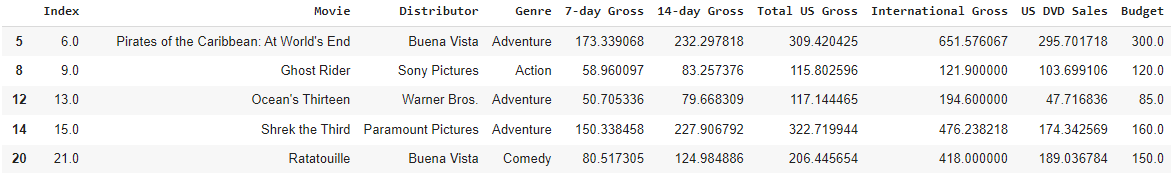

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x